# Project 2 - Ames Housing Data and Kaggle Challenge

In [1]:
#Imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

## Data Import and Cleaning

### Read in train and test Data

In [2]:
train_data = pd.read_csv('./datasets/train.csv', keep_default_na=False, na_values=[''])
test_data = pd.read_csv('./datasets/test.csv', keep_default_na=False, na_values=[''])

### Display first five rows of the two datasets

In [3]:
train_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
test_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [5]:
train_data.dtypes[:55]

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

### Get the shapes of train and test data

In [6]:
print(train_data.shape)
print(test_data.shape)

(2051, 81)
(878, 80)


### Check for missing values

In [7]:
train_data.isnull().sum().sort_values(ascending=False)[:26]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cond         1
Bsmt Qual           1
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Total Bsmt SF       1
BsmtFin Type 1      1
Bsmt Cond           1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
dtype: int64

In [8]:
test_data.isnull().sum().sort_values(ascending=False)[:19]

Lot Frontage      160
Garage Yr Blt      45
Garage Finish       1
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Misc Feature        0
Half Bath           0
Mo Sold             0
Yr Sold             0
TotRms AbvGrd       0
Kitchen Qual        0
Kitchen AbvGr       0
Bedroom AbvGr       0
Full Bath           0
Fireplaces          0
Bsmt Half Bath      0
Bsmt Full Bath      0
Gr Liv Area         0
dtype: int64

In [9]:
# fix column names by replacing spaces with underscores and converting them to lower case
train_data.columns = train_data.columns.str.replace(' ', '_')
train_data.columns = train_data.columns.str.lower()

In [10]:
test_data.columns = test_data.columns.str.replace(' ', '_')
test_data.columns = test_data.columns.str.lower()

In [11]:
categorical_columns=['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'garage_finish', 'garage_cond', 
              'garage_qual', 'garage_type', 'bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1', 'bsmt_cond', 
              'bsmt_qual', 'mas_vnr_type'] 
[train_data[col].replace(np.nan,'NA',inplace=True) for col in categorical_columns]
train_data.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [12]:
[test_data[col].replace(np.nan,'NA',inplace=True) for col in categorical_columns]
test_data.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New


In [13]:
numerical_columns=['lot_frontage', 'garage_yr_blt', 'mas_vnr_area', 'bsmt_half_bath', 'bsmt_full_bath', 
                'garage_cars', 'garage_area', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'total_bsmt_sf', 'bsmtfin_sf_1']
[train_data[col].fillna(value=0.0,inplace=True) for col in numerical_columns]
train_data.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [14]:
[test_data[col].fillna(value=0.0,inplace=True) for col in numerical_columns]
test_data.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New


In [15]:
train_data.replace('None', 'NA', inplace=True)
train_data['mas_vnr_type'].unique()

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

In [16]:
test_data.replace('None', 'NA', inplace=True)
test_data['mas_vnr_type'].unique()

array(['NA', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock'], dtype=object)

### Feature Engineering

In [17]:
train_data['bathrooms'] = train_data['bsmt_full_bath'] + train_data['full_bath']+(train_data['bsmt_half_bath']/2) + (train_data['half_bath']/2)

In [18]:
test_data['bathrooms'] = test_data['bsmt_full_bath'] + test_data['full_bath']+(test_data['bsmt_half_bath']/2) + (test_data['half_bath']/2)

In [19]:
train_data['has_pool'] = np.where(train_data['pool_qc'].str.contains('NA'), 0, 1)

In [20]:
test_data['has_pool'] = np.where(test_data['pool_qc'].str.contains('NA'), 0, 1)

In [21]:
train_data['has_fence'] = np.where(train_data['fence'].str.contains('NA'), 0, 1)

In [22]:
test_data['has_fence'] = np.where(test_data['fence'].str.contains('NA'), 0, 1)

In [23]:
train_data['has_central_air'] = np.where(train_data['central_air'].str.contains('N'), 0, 1)

In [24]:
test_data['has_central_air'] = np.where(test_data['central_air'].str.contains('N'), 0, 1)

In [25]:
train_data['paved_street'] = train_data['street'].map({'Pave': 1, 'Grvl': 0})

In [26]:
test_data['paved_street'] = test_data['street'].map({'Pave': 1, 'Grvl': 0})

In [27]:
train_data['garage_cars'] = train_data['garage_cars'].astype(int)

In [28]:
test_data['garage_cars'] = test_data['garage_cars'].astype(int)

In [29]:
train_data['has_garage'] = np.where(train_data['garage_finish'].str.contains('NA'), 0, 1)

In [30]:
test_data['has_garage'] = np.where(test_data['garage_finish'].str.contains('NA'), 0, 1)

In [31]:
train_data['is_remodeled'] = np.where(train_data['year_remod/add'] - train_data['year_built'] > 0, 1, 0)

In [32]:
test_data['is_remodeled'] = np.where(test_data['year_remod/add'] - test_data['year_built'] > 0, 1, 0)

In [33]:
train_data.shape

(2051, 88)

In [34]:
test_data.shape

(878, 87)

### Rename the columns in Train and Test data

In [35]:

rename_columns_dict = {
    'pid': 'parcel_id',
    'ms_subclass' : 'ms_sub_class',
    'ms_zoning': 'zoning', 
    'lot_frontage': 'lot_frontage',
    'Lot Area': 'lot_sq_ft',
    'street': 'street', 
    'alley': 'alley', 
    'lot_shape': 'lot_shape', 
    'land_contour': 'property_flatness', 
    'utilities': 'utilities',       
    'lot_config': 'lot_config', 
    'land_slope': 'land_slope', 
    'neighborhood': 'neighborhood', 
    'condition_1': 'proximity_1',
    'condition_2': 'proximity_2', 
    'bldg_type': 'building_type', 
    'house_style': 'dwelling_style', 
    'overall_qual': 'house_quality_rating',
    'overall_cond': 'house_condition_rating', 
    'year_built': 'year_built', 
    'year_remod/add': 'remodel_year', 
    'roof_style': 'roof_style',
    'roof_matl': 'roof_material', 
    'exterior_1st': 'exterior_1', 
    'exterior_2nd': 'exterior_2', 
    'mas_vnr_type': 'masonry_type',
    'mas_vnr_area': 'masonry_area', 
    'exter_qual': 'exterior_quality', 
    'exter_cond': 'exterior_condition', 
    'foundation': 'foundation_type', 
    'bsmt_qual': 'basement_height',
    'bsmt_cond': 'basement_condition', 
    'bsmt_exposure': 'basement_exposure', 
    'bsmtfin_type_1': 'basement_finished_condition', 
    'bsmtfin_sf_1': 'basement_finished_sqft',
    'bsmtfin_type_2': 'basement_multipletypes_condition', 
    'bsmtfin_sf_2': 'basement_type2_finished_sqft', 
    'bsmt_unf_sf': 'unfinished_basement_sqft', 
    'total_bsmt_sf': 'total_basement_sqft',
    'heating': 'heating_type', 
    'heating_qc': 'heating_quality', 
    'central_air': 'central_air', 
    'has_central_air':'has_central_air',
    'electrical':'electrical_system', 
    '1st_flr_sf':'first_floor_sqft',
    '2nd_flr_sf': 'second_floor_sqft', 
    'low_qual_fin_sf': 'low_quality_sqft', 
    'gr_liv_area': 'above_ground_living_area_sqft', 
    'bsmt_full_bath': 'basement_full_bath',
    'bsmt_half_bath': 'basement_half_bath', 
    'full_bath': 'full_bath', 
    'half_bath': 'half_bath', 
    'bedroom_abvgr': 'bedrooms',
    'kitchen_abvgr': 'kitchens', 
    'kitchen_qual': 'kitchen_quality', 
    'totrms_abvgrd': 'total_rooms(non-bath)', 
    'functional': 'home_functionality',
    'fireplaces': 'fireplaces', 
    'fireplace_qu': 'fireplace_quality', 
    'garage_type': 'garage_location', 
    'garage_yr_blt': 'garage_year_built',
    'garage_finish': 'garage_interior_finish', 
    'garage_cars': 'garage_capacity', 
    'garage_area': 'garage_sqft', 
    'garage_qual': 'garage_quality',
    'garage_cond': 'garage_condition', 
    'paved_drive': 'driveway_type', 
    'wood_deck_sf': 'wood_deck_sqft', 
    'open_porch_sqft': 'open_porch_sqft',
    'enclosed_porch': 'enclosed_porch_sqft', 
    '3ssn_porch': 'three_season_porch_sqft', 
    'screen_porch': 'screen_porch_sqft', 
    'pool_area': 'pool_size', 
    'pool_qc': 'pool_quality',
    'fence': 'fence', 
    'misc_feature': 'misc_feature',
    'misc_val': 'misc_feature_value',
    'mo_sold': 'month_sold', 
    'yr_sold': 'year_sold', 
    'sale_type': 'sale_type', 
    'saleprice': 'price',
    'bathrooms' :'bathrooms',
    'has_pool' : 'has_pool',
    'has_fence' : 'has_fence',
    'paved_street' :'paved_street',
    'has_garage':'has_garage',
    'is_remodeled':'is_remodeled'
}

In [36]:
train_data.rename(columns=rename_columns_dict, inplace=True)

In [37]:
test_data.rename(columns=rename_columns_dict, inplace=True)

In [38]:
test_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,street,alley,lot_shape,property_flatness,...,month_sold,year_sold,sale_type,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,4,2006,WD,2.0,0,0,0,1,1,1
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,8,2006,WD,2.0,0,0,1,1,1,0
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,9,2006,New,3.5,0,0,1,1,1,0


In [39]:
train_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,street,alley,lot_shape,property_flatness,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,2010,WD,130500,2.5,0,0,1,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,2009,WD,220000,3.5,0,0,1,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,2010,WD,109000,2.0,0,0,1,1,1,1


### Drop the columns on which features in feature engineering were created

In [40]:
train_data.drop(columns=['pool_quality','full_bath','half_bath','basement_full_bath',
                        'basement_half_bath','fence','street','central_air',
                        'garage_interior_finish','first_floor_sqft','second_floor_sqft','low_quality_sqft','basement_finished_sqft',
                         'basement_type2_finished_sqft','unfinished_basement_sqft','alley','remodel_year'
                         ],inplace=True)

In [41]:
train_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,109,533352170,60,RL,0.0,13517,IR1,Lvl,AllPub,CulDSac,...,2010,WD,130500,2.5,0,0,1,1,1,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,...,2009,WD,220000,3.5,0,0,1,1,1,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,...,2010,WD,109000,2.0,0,0,1,1,1,1


In [42]:
test_data.drop(columns=['pool_quality','full_bath','half_bath','basement_full_bath',
                        'basement_half_bath','fence','street','central_air',
                        'garage_interior_finish','first_floor_sqft','second_floor_sqft','low_quality_sqft','basement_finished_sqft',
                         'basement_type2_finished_sqft','unfinished_basement_sqft','alley','remodel_year'
                         ],inplace=True)

In [43]:
test_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,month_sold,year_sold,sale_type,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,...,4,2006,WD,2.0,0,0,0,1,1,1
1,2718,905108090,90,RL,0.0,9662,IR1,Lvl,AllPub,Inside,...,8,2006,WD,2.0,0,0,1,1,1,0
2,2414,528218130,60,RL,58.0,17104,IR1,Lvl,AllPub,Inside,...,9,2006,New,3.5,0,0,1,1,1,0


In [44]:
train_data.reset_index(drop=True,inplace=True)

### Check and remove outliers

In [45]:
train_data[train_data['total_basement_sqft'] >= 5000]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
960,1499,908154235,60,RL,313.0,63887,IR3,Bnk,AllPub,Corner,...,2008,New,160000,4.5,1,0,1,1,1,0
1885,2181,908154195,20,RL,128.0,39290,IR1,Bnk,AllPub,Inside,...,2007,New,183850,4.0,0,0,1,1,1,1


In [46]:
train_data.drop(train_data[train_data['total_basement_sqft'] >= 5000].index,inplace=True)

In [47]:
train_data.reset_index(drop=True,inplace=True)

In [48]:
train_data[train_data['total_basement_sqft'] >= 5000]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled


In [49]:
train_data.loc[train_data['bathrooms'] >= 5]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
791,763,904301060,90,RL,60.0,10800,Reg,Lvl,AllPub,Inside,...,2009,WD,179000,6.0,0,0,1,1,0,1
1324,1487,908102040,90,RL,67.0,8777,Reg,Lvl,AllPub,Inside,...,2008,WD,145900,5.0,0,1,1,1,0,1
1565,816,906230010,90,RL,0.0,11855,Reg,Lvl,AllPub,Inside,...,2009,WD,269500,7.0,0,0,1,1,1,0
1583,764,904301070,90,RL,60.0,10800,Reg,Lvl,AllPub,Inside,...,2009,WD,179000,6.0,0,0,1,1,0,1
1604,817,906230020,90,RL,0.0,7939,Reg,Lvl,AllPub,Inside,...,2009,WD,269500,7.0,0,0,1,1,1,0


In [50]:
train_data.drop(train_data[train_data['bathrooms'] >= 5].index,inplace=True)

In [51]:
train_data.reset_index(drop=True,inplace=True)

In [52]:
train_data.loc[train_data['masonry_area'] >= 1600]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
1406,1850,533241030,60,FV,66.0,7399,IR1,Lvl,AllPub,Inside,...,2007,WD,239000,2.5,0,0,1,1,1,1


In [53]:
train_data.drop(train_data[train_data['masonry_area'] >= 1600].index,inplace=True)

In [54]:
train_data.reset_index(drop=True,inplace=True)

In [55]:
train_data.loc[train_data['garage_capacity'] > 4]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
924,747,903236040,30,RM,50.0,8635,Reg,Lvl,AllPub,Inside,...,2009,WD,126500,2.0,0,0,1,1,1,1


In [56]:
train_data.drop(train_data[train_data['garage_capacity'] > 4].index,inplace=True)

In [57]:
train_data.reset_index(drop=True,inplace=True)

In [58]:
test_data.shape

(878, 70)

In [59]:
train_data.shape

(2042, 71)

## EDA

### Descriptive Statistics

In [60]:
train_data.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
id,2042.0,1.475181e+03,8.449565e+02,1.0,7.522500e+02,1487.0,2.200750e+03,2930.0
parcel_id,2042.0,7.129242e+08,1.886796e+08,526301100.0,5.284581e+08,535453085.0,9.071790e+08,924152030.0
ms_sub_class,2042.0,5.695642e+01,4.287534e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
lot_frontage,2042.0,5.783546e+01,3.263798e+01,0.0,4.325000e+01,63.0,7.800000e+01,313.0
lot_area,2042.0,1.002662e+04,6.619121e+03,1300.0,7.500000e+03,9417.5,1.150900e+04,159000.0
house_quality_rating,2042.0,6.109207e+00,1.422960e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
house_condition_rating,2042.0,5.563663e+00,1.105911e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
year_built,2042.0,1.971676e+03,3.014157e+01,1872.0,1.953250e+03,1974.0,2.001000e+03,2010.0
masonry_area,2042.0,9.726592e+01,1.689182e+02,0.0,0.000000e+00,0.0,1.580000e+02,1129.0
total_basement_sqft,2042.0,1.052701e+03,4.274745e+02,0.0,7.922500e+02,992.0,1.318750e+03,3206.0


In [61]:
train_data['price'].describe()

count      2042.000000
mean     181411.414300
std       79360.457792
min       12789.000000
25%      129575.000000
50%      162250.000000
75%      214000.000000
max      611657.000000
Name: price, dtype: float64

## Data Visualization

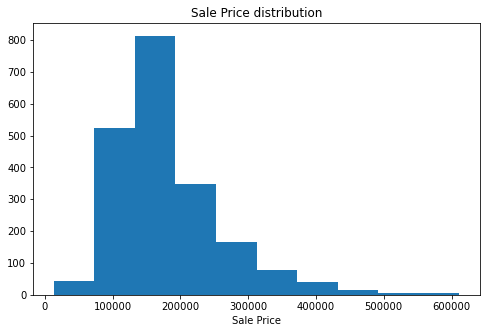

In [62]:
plt.figure(figsize=(8,5))
plt.hist(train_data[['price']])
plt.title('Sale Price distribution')
plt.xlabel('Sale Price');

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


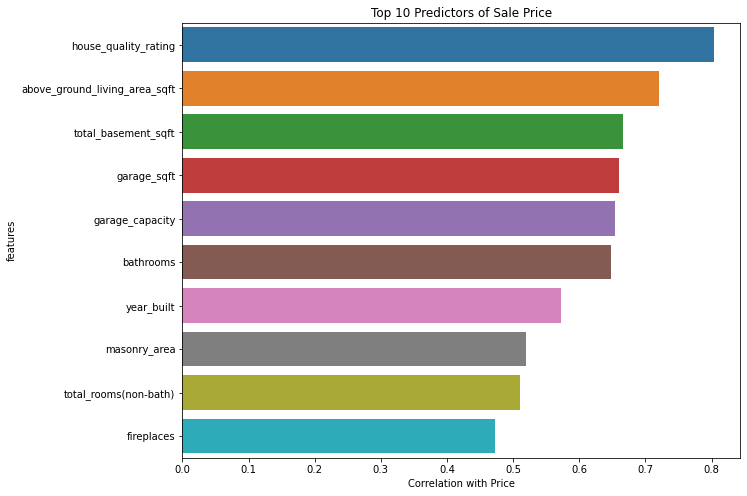

In [63]:
predictors = train_data.corr()[['price']].sort_values(by='price', ascending=False)
corr_df = pd.DataFrame(predictors.iloc[1:11])

plt.figure(figsize=(10, 8))
sns.barplot( corr_df['price'], corr_df.index)
plt.title('Top 10 Predictors of Sale Price')
plt.xlabel('Correlation with Price', fontsize=10);
plt.ylabel('features', fontsize=10);

Text(0.5, 1.0, 'House Quality Rating vs Sale Price')

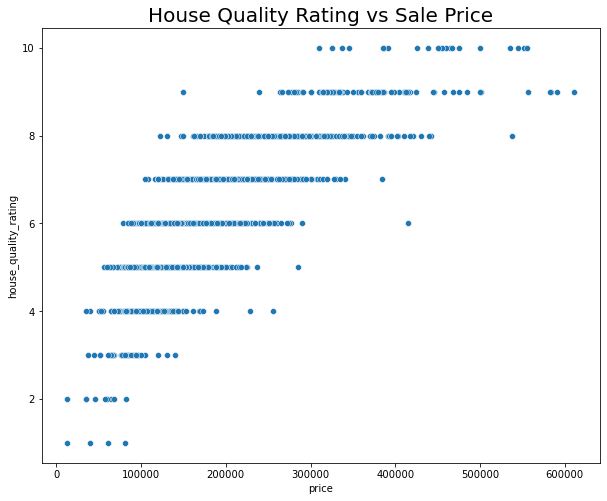

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='house_quality_rating', data=train_data)
plt.title('House Quality Rating vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Above Ground Living Area Square Footage vs Sale Price')

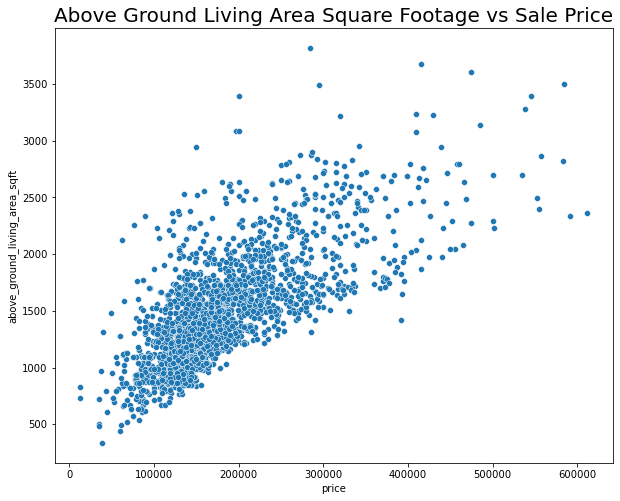

In [65]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='above_ground_living_area_sqft', data=train_data)
plt.title('Above Ground Living Area Square Footage vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Total Basement Square Footage vs Sale Price')

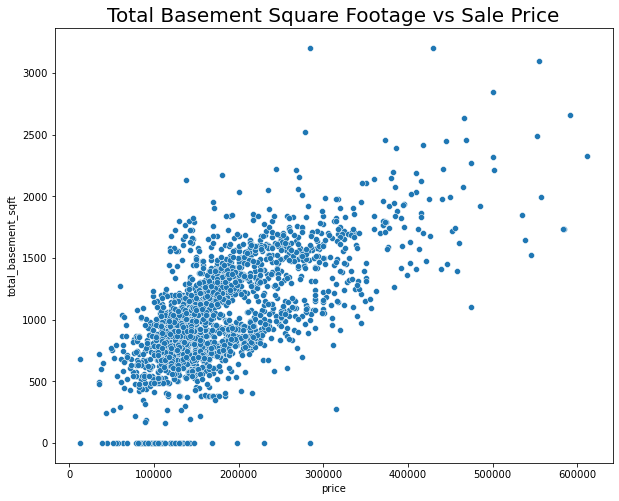

In [66]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='total_basement_sqft', data=train_data)
plt.title('Total Basement Square Footage vs Sale Price', fontsize=20)

## Data Modeling

In [67]:
features = ['house_quality_rating', 'above_ground_living_area_sqft', 'garage_sqft','garage_capacity','bathrooms',
            'total_basement_sqft','year_built','total_rooms(non-bath)','masonry_area',
            'fireplaces']
X=train_data[features]
y=train_data['price']

In [68]:
X_testdata=test_data[features]

### Polynomial Features

In [69]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

In [70]:
poly

PolynomialFeatures(include_bias=False)

In [71]:
# Create X_poly
X_poly = poly.fit_transform(X)

In [72]:
# X_poly is a numpy array with the original AND new columns!
X_poly

array([[6.0000e+00, 1.4790e+03, 4.7500e+02, ..., 8.3521e+04, 0.0000e+00,
        0.0000e+00],
       [7.0000e+00, 2.1220e+03, 5.5900e+02, ..., 1.7424e+04, 1.3200e+02,
        1.0000e+00],
       [5.0000e+00, 1.0570e+03, 2.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [6.0000e+00, 1.9130e+03, 3.4200e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.0000e+00, 1.2000e+03, 2.9400e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [7.0000e+00, 1.8040e+03, 4.4200e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [73]:
X_testdata_poly=poly.fit_transform(X_testdata)

In [74]:
# Get the feature names using "get_feature_names"
poly.get_feature_names(features)

['house_quality_rating',
 'above_ground_living_area_sqft',
 'garage_sqft',
 'garage_capacity',
 'bathrooms',
 'total_basement_sqft',
 'year_built',
 'total_rooms(non-bath)',
 'masonry_area',
 'fireplaces',
 'house_quality_rating^2',
 'house_quality_rating above_ground_living_area_sqft',
 'house_quality_rating garage_sqft',
 'house_quality_rating garage_capacity',
 'house_quality_rating bathrooms',
 'house_quality_rating total_basement_sqft',
 'house_quality_rating year_built',
 'house_quality_rating total_rooms(non-bath)',
 'house_quality_rating masonry_area',
 'house_quality_rating fireplaces',
 'above_ground_living_area_sqft^2',
 'above_ground_living_area_sqft garage_sqft',
 'above_ground_living_area_sqft garage_capacity',
 'above_ground_living_area_sqft bathrooms',
 'above_ground_living_area_sqft total_basement_sqft',
 'above_ground_living_area_sqft year_built',
 'above_ground_living_area_sqft total_rooms(non-bath)',
 'above_ground_living_area_sqft masonry_area',
 'above_ground_livi

In [75]:
# View X_poly in a DataFrame
X_poly_df=pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [76]:
X_testdata_poly_df=pd.DataFrame(X_testdata_poly, columns=poly.get_feature_names(features))

### Train Test Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [78]:
# Get the shapes of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1531, 65)
(511, 65)
(1531,)
(511,)


### Scaling the data

In [79]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
test_data_sc=sc.transform(X_testdata_poly_df)

In [80]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1531, 65)
y_train shape is: (1531,)
Z_test shape is: (511, 65)
y_test shape is: (511,)


### Linear Regression

In [81]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [82]:
print(" OLS ".center(18, "="))
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))
print()

====== OLS =======
0.903687683067107
0.8831149537762257



In [83]:
ols.intercept_

181819.83082952327

In [84]:
ols.coef_

array([ 122239.71507083,  -67082.44062647, -151413.1748717 ,
        119539.4162611 , -196447.95219046, -110772.26996498,
        -60366.28152953,  -17288.72730817, -244553.54558689,
        171090.55825937,  -13511.27799104,   34577.15505723,
         24407.1582839 ,  -11995.89785994,    3229.35784051,
         44077.35512083, -142107.79576143,   14841.04883531,
         -1892.58399506,   11331.39605178,   32386.90204813,
        -24622.84856906,    6196.59973396,   33417.29582177,
         -8575.15308825,   72428.60664464,  -68632.02159282,
        -26609.86802742,   14929.59469226,   -7180.27323814,
         28924.3004935 ,   -2202.92044231,    5025.72444792,
        149340.73609116,    2667.21081738,   -5317.30370624,
         -4090.83827573,  -24725.92005665,    6416.89123001,
         -7476.28718926, -121620.82934853,   15333.91064283,
         12031.28802669,    9848.82960849,   -8690.15232295,
         12905.33693287,  199623.86488234,  -15087.76805992,
         10621.06992536,

In [85]:
lr_coef_df = pd.DataFrame([ols.coef_, poly.get_feature_names(features)], index = ['Coefficients', 'Features']).T
lr_coef_df = lr_coef_df.set_index('Features')

lr_coef_df = lr_coef_df.sort_values(by='Coefficients',ascending=False)
lr_coef_df.head(10)

,Coefficients
Features,
year_built masonry_area,226117.317675
bathrooms year_built,199623.864882
fireplaces,171090.558259
garage_sqft year_built,149340.736091
house_quality_rating,122239.715071
garage_capacity,119539.416261
total_basement_sqft year_built,102891.757128
above_ground_living_area_sqft year_built,72428.606645
year_built^2,65503.774516


In [86]:
ols.predict(Z_train)

array([105686.01423355, 306271.67496749, 145235.59444409, ...,
       135745.32126866, 108977.9717688 , 250883.0682619 ])

In [87]:
ols.predict(Z_test)

array([145399.31661526, 219399.19684243, 121350.13185469, 158296.56950521,
       434421.43125615, 252941.86171344, 334469.03075851, 213994.82060421,
       126864.14898131, 111377.71755138, 170192.03809896, 330768.64881992,
       136021.4624694 , 182113.83296906, 243270.02411729, 160243.13514058,
       140192.37548458, 146119.47267726, 143677.46638088, 218001.5854583 ,
       125344.23825786, 145406.24521167, 119958.28734479, 339817.80724955,
       156426.18823729, 179290.07692416, 256491.12936432, 124801.62576467,
       140152.9016925 , 182307.20142204,  86471.28531643, 157685.31088601,
       182250.43127073, 196866.2236827 , 499005.72892533, 131678.12673868,
       131290.9811054 , 130571.61249857, 300688.76966708, 234052.37175793,
       271341.62544761, 104388.28568535, 343707.54999017, 169851.69610001,
       113287.31331972, 334458.6684632 , 103725.23332643, 201897.27904298,
       150439.98676242, 164708.65968354, 246079.12679039, 153405.02761978,
       163379.39701557, 1

In [88]:
y_scaler_preds=ols.predict(Z_train)
y_scaler_preds_test=ols.predict(Z_test)

In [89]:
mean_squared_error(y_true=y_test, y_pred=y_scaler_preds_test, squared=False)

26661.953684419863

### RidgeCV Regression

In [90]:
r_alphas = np.logspace(0, 2, 10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

In [91]:
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ]),
        cv=5, scoring='r2')

In [92]:
ridge_cv.alpha_

12.91549665014884

In [93]:
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

===== Ridge ======
0.8979340861503027
0.8875055457288323


In [94]:
np.shape(ridge_cv.coef_)

(65,)

In [95]:
ridge_cv_coef_df = pd.DataFrame({
    'column' : poly.get_feature_names(features),
    'coef'   : ridge_cv.coef_
})

In [96]:
ridge_cv_coef_df = pd.DataFrame([ridge_cv.coef_, poly.get_feature_names(features)], index = ['Coefficients', 'Features']).T
ridge_cv_coef_df = ridge_cv_coef_df.set_index('Features')

ridge_cv_coef_df = ridge_cv_coef_df.sort_values(by='Coefficients',ascending=False)
ridge_cv_coef_df.head(10)

,Coefficients
Features,
house_quality_rating total_basement_sqft,23350.514541
house_quality_rating above_ground_living_area_sqft,18276.418156
house_quality_rating total_rooms(non-bath),12916.4779
total_rooms(non-bath) masonry_area,11619.405226
bathrooms total_basement_sqft,11442.529346
bathrooms masonry_area,11326.012396
house_quality_rating fireplaces,9348.91372
house_quality_rating garage_sqft,9147.41747
above_ground_living_area_sqft bathrooms,9103.721855


In [97]:
ridgecv_preds=ridge_cv.predict(Z_train)
ridgecv_preds_test=ridge_cv.predict(Z_test)

In [98]:
mean_squared_error(y_true=y_test, y_pred=ridgecv_preds_test, squared=False)#RMSE of Ridge Model

26156.404791528366

### LassoCV Regression

In [99]:
lasso_cv = LassoCV(n_alphas=100, cv=5)

# Fit model using best lasso alpha!
lasso_cv.fit(Z_train, y_train);

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15426827501.591919, tolerance: 974561673.5703186
  model = cd_fast.enet_coordinate_descent(


In [100]:
lasso_cv.alpha_

140.36889650751422

In [101]:
print(" LASSO ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

===== LASSO ======
0.8950705701400375
0.8879099532960163


In [102]:
test_subset = test_data_sc
kaggle_preds_lasso = lasso_cv.predict(test_subset)

In [103]:
kaggle_df_lasso = pd.DataFrame({
    'Id': test_data['id'],
    'SalePrice': kaggle_preds_lasso
})

In [104]:
kaggle_df_lasso.to_csv('submissions/lasso.csv', index=False)

In [105]:
lasso_preds=lasso_cv.predict(Z_train)
lasso_preds_test=lasso_cv.predict(Z_test)

In [106]:
np.shape(lasso_cv.coef_)

(65,)

In [107]:
coef_df = pd.DataFrame([lasso_cv.coef_, poly.get_feature_names(features)], index = ['Coefficients', 'Features']).T
coef_df = coef_df.set_index('Features')

coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
coef_df.head(10)

,Coefficients
Features,
house_quality_rating above_ground_living_area_sqft,32561.687357
house_quality_rating total_basement_sqft,30773.59154
bathrooms masonry_area,11047.788636
bathrooms total_basement_sqft,8105.145652
house_quality_rating garage_sqft,7946.876334
total_basement_sqft masonry_area,6796.670265
garage_capacity masonry_area,5719.290818
year_built,5258.738626
house_quality_rating fireplaces,5242.704467


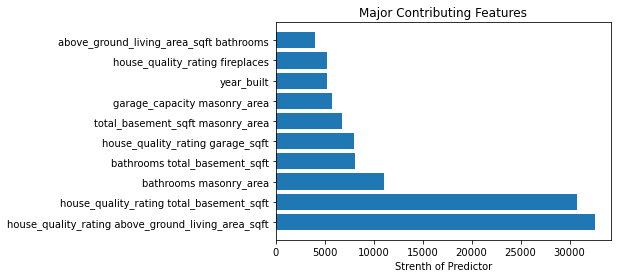

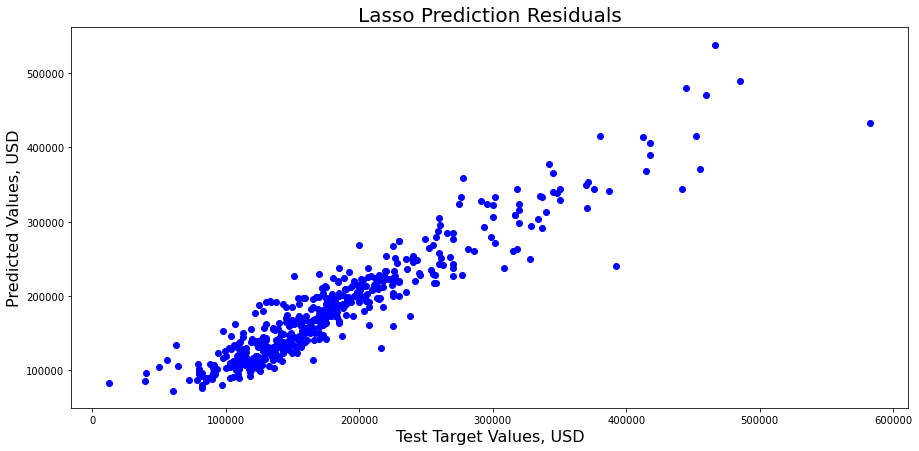

In [108]:
plt.barh(y=coef_df.index[:10], width=coef_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

plt.figure(figsize=(15,7))

plt.scatter(y_test, lasso_preds_test, color='b');
plt.title('Lasso Prediction Residuals', fontsize=20)
plt.xlabel('Test Target Values, USD', fontsize=16)
plt.ylabel('Predicted Values, USD', fontsize=16)
plt.show()

In [109]:
mean_squared_error(y_true=y_test, y_pred=lasso_preds_test,squared=False) #RMSE of lasso CV Model

26109.347486220548

In [110]:
len(coef_df[coef_df['Coefficients'] == 0]) / len(coef_df['Coefficients'])

0.5230769230769231

## Model Evauation

|        Model       	| Train Score 	| Test Score 	|   RMSE  	|
|:------------------:	|:-----------:	|:----------:	|:-------:	|
| 	Linear Regression 	|     0.90    	|    0.88    	|  26661 	|
|        RidgeCV      	|     0.89    	|    0.88    	|  26156    |
|      LassoCV      	|     0.89    	|    0.88    	|  26109  	|